# Chapter 2 지도학습

[TOC]

## 2.1 분류classification와 회귀regression

* 이진분류 binary classification: Yes/No
* 다중분류 multiple classification: Iris example
* 회귀 regression: 실수(부동소수점수) 예측

## 2.2 일반화generalization, 과대적합overfitting, 과소적합underfitting

* 일반화 generalization: 모델이 새로운 데이터에 대해 정확히 예측하는 것. training set에서 test set로 일반화 되었다.
* 과대적합 overfitting: 너무 복잡한 모델을 만든 것
* 과소적합 underfitting: 너무 간단한 모델이 선택되는 것

## 2.3 지도 학습 알고리즘

* 예제1

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib notebook
%matplotlib inline

In [2]:
import sys
print("Python 버전: {}".format(sys.version))
import pandas as pd
print("pandas 버전: {}".format(pd.__version__))
import matplotlib
print("matplotlib 버전: {}".format(matplotlib.__version__))
import numpy as np
print("Numpy 버전: {}".format(np.__version__))
import scipy as sp
print("SciPy 버전: {}".format(sp.__version__))
import IPython
print("IPython 버전: {}".format(IPython.__version__))
import sklearn
print("scikit-learn 버전: {}".format(sklearn.__version__))

Python 버전: 3.6.2 (v3.6.2:5fd33b5, Jul  8 2017, 04:57:36) [MSC v.1900 64 bit (AMD64)]
pandas 버전: 0.22.0
matplotlib 버전: 2.1.1
Numpy 버전: 1.13.3
SciPy 버전: 1.0.0
IPython 버전: 6.2.1
scikit-learn 버전: 0.19.1


X.shape: (26, 2)


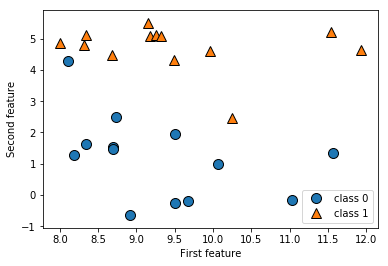

In [3]:
X,y = mglearn.datasets.make_forge()
# plot
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["class 0","class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

* 예제2

Text(0,0.5,'Target')

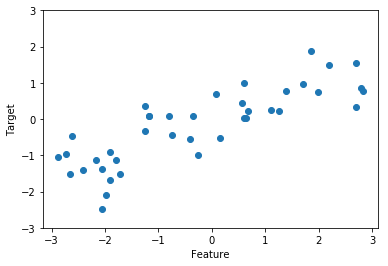

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

* 예제3: scikit-learn의 load_breast_cancer 데이터

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cacner.keys(): \n{}".format(cancer.keys()))

cacner.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print("cancer dataset: {}".format(cancer.data.shape))

cancer dataset: (569, 30)


In [7]:
print("sample numbers: {}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
# 오 이건 신기하다.

sample numbers: {'malignant': 212, 'benign': 357}


In [8]:
print("feature names:\n{}".format(cancer.feature_names))

feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


* 예제4: 보스턴 주택가격 Boston housing

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("data shape: {}".format(boston.data.shape))

data shape: (506, 13)


In [10]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### 2.3.2 K-Nearest Neighbors (KNN)
* 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용함

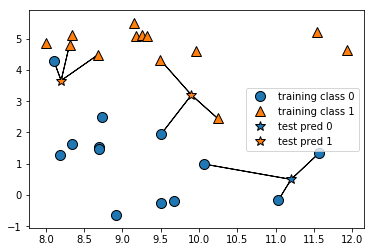

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

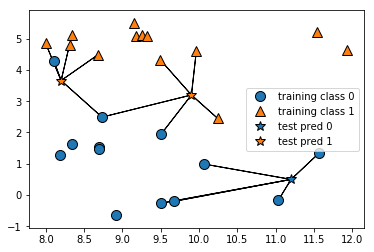

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [13]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print("Test expect: {}".format(clf.predict(X_test)))
print("Test accuracy: {:.2f}".format(clf.score(X_test,y_test)))

Test expect: [1 0 1 0 1 0 0]
Test accuracy: 0.86


### KNeighborsClassifier 분석

* 결과 plot으로 그리기

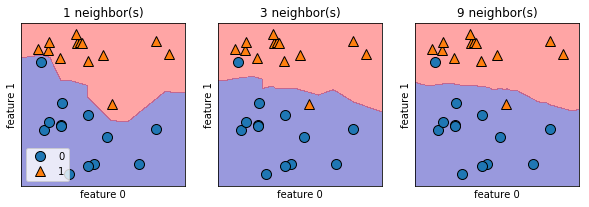

In [17]:
fig, axes = plt.subplots(1,3, figsize=(10,3)) # 3분할 그래프 설정
for n_neighbors, ax in zip([1,3,9],axes):
    # fit 메서드는 self 객체를 반환
    # 따라서 객체 생성과 fit 메서드를 한줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

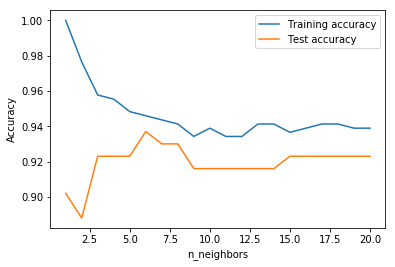

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 - 20까지 n_neighbors 적용
neighbors_settings = range(1,21)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

* 결과를 통해보면 이웃의 수가 늘어날수록 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦.
* 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음.
* 이는 1-NN이 모델을 너무 복잡하게 만든다는 것임.
* 반대로 이웃을 10개 이상 사용한 경우 너무 단순해서 정확도가 하락하는 것을 확인할 수 있음.
* 6-NN 일 때 가장 좋은 결과를 보임을 알 수 있음.

### k-NN regression

* 회귀분석에서 k-NN은 다음과 같이 사용함

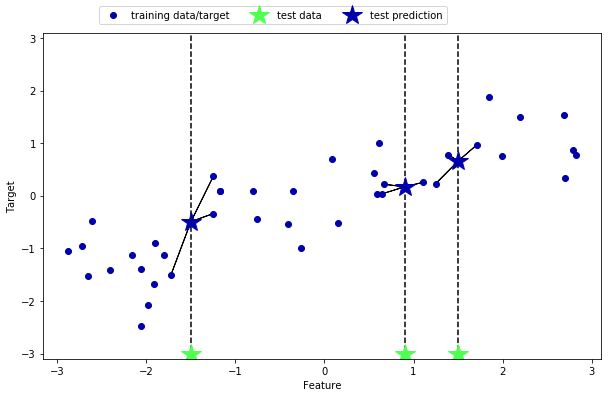

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

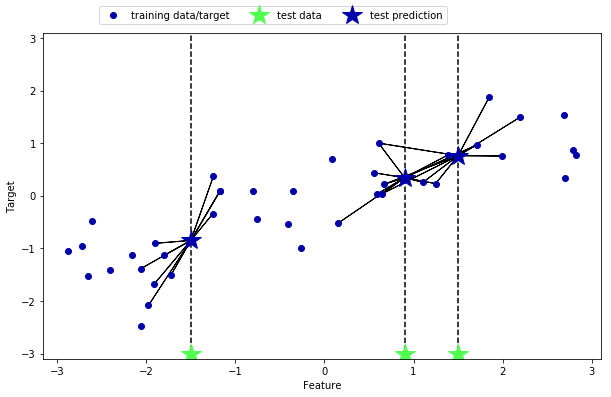

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=10)

* KNeighborsRegressor 예제

In [21]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 training-set, test-set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# 이웃의 수를 3으로 하여 모델의 객체를 만듦
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학슴시킴
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("Test-set prediction:\n{}".format(reg.predict(X_test)))
print("Test-set R^2: {:.2f}".format(reg.score(X_test,y_test)))

Test-set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test-set R^2: 0.83


* KNeighborsRegressor 분석

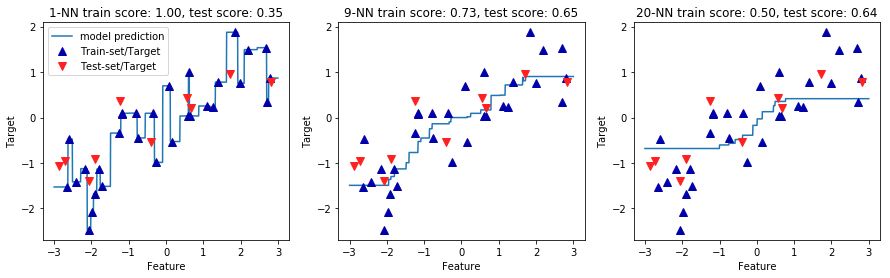

In [23]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
#-3~3 사이 1,000개 데이터 포인트 만듦
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,9,20],axes):
    # 1,3,9 이웃을 사용한 예측 실시
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
        "{}-NN train score: {:.2f}, test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["model prediction","Train-set/Target","Test-set/Target"],loc="best")

* 하나의 이웃을 참고할 때는 예측값이 훈련 데이터 포인트를 모두 지나감.
* 이는 불안정한 예측 모델임
* 참고 이웃이 많을 경우, 훈련 데이터는 잘 안맞지만 더 안정된 예측을 얻게됨

### Pros of k-NN

* k-NN은 이해하기 매우 쉬운 모델임
* 많이 조정하지 않아도 좋은 성능을 발휘함
* 더 복잡한 알고리즘을 적용하기 전에 시도하기 좋은 알고리즘임

### Cons of k-NN

* 훈련 세트의 크기가 매우 크면 예측이 느려짐
* k-NN 사용시 데이터 전처리 과정이 중요함
* 많은 특성을 가진 데이터에는 잘 동작하지 않음
* 특성 값 대부분이 0인 (즉 희소한) 데이터셋에 적합하지 않음

### 2.3.3 Linear model

* 입력 특성에 대한 선형 함수를 만들어 예측을 수행함

w[0]: 0.393906  b: -0.031804


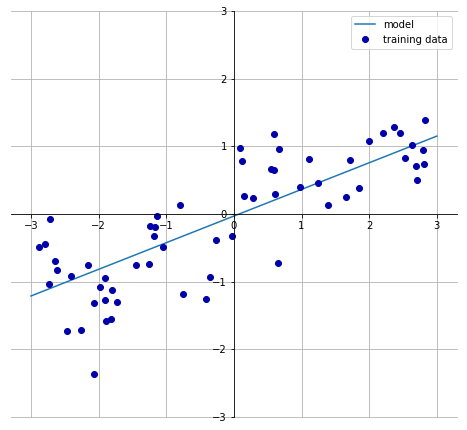

In [24]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (OLS, ordinary least squares 최소제곱법)

* 가장 간단하고 오래된 회귀용 선형 알고리즘
* 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차 mean squared error를 최소화하는 파라미터 w(기울기)와 b(절편)을 찾음
* 선형 회귀는 매개변수가 없는 것이 장점이지만, 따라서 모델의 복잡도를 제어할 방법이 없음

In [25]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [26]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print("Train-set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(lr.score(X_test,y_test)))

Train-set score: 0.67
Test-set score: 0.66


* R^2의 값이 0.66이므로 별로 좋지 않음
* 훈련 세트와 테스트 세트의 점수가 비슷하므로 과소적합 상태임을 알 수 있음
* 1차원 데이터셋에서는 모델이 단순하므로 과대적합을 걱정할 필요 없음
* 고차원의 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합될 가능성이 높음

### 고차원 데이터셋: Boston housing

* 샘플 506개, 특성 105개

In [28]:
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [29]:
print("Train-set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(lr.score(X_test,y_test)))

Train-set score: 0.95
Test-set score: 0.61


* train-set과 Test-set의 성능 차이는 과대적합의 증거임
* 이 경우 복잡도 제어 모델을 사용해야함
* 대안으로 **릿지 회귀**가 있음

### Ridge regression

* 규제regularization를 통해 과대적합을 강제로 제한 가능함
* 릿지 회귀에서 사용하는 규제 방식을 L2 규제라 함

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Train-set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(ridge.score(X_train,y_train)))

Train-set score: 0.89
Test-set score: 0.89


In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Train-set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(ridge10.score(X_train,y_train)))

Train-set score: 0.79
Test-set score: 0.79


* alpha를 줄이면 제약이 풀림
* 아주 작은 alpha 값(<0.00001)은 계수를 거의 제한하지 않으므로 LinearRegression 모델과 같은 결과를 보임

In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Train-set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(ridge01.score(X_train,y_train)))

Train-set score: 0.93
Test-set score: 0.93


* alpha=0.1의 성능이 좋음
* alpha에 따른 coef_ 속성 변화를 조사하면 alpha의 기능을 이해할 수 있음
* 높은 alpha는 높은 coef_를 가질 것으로 예상됨

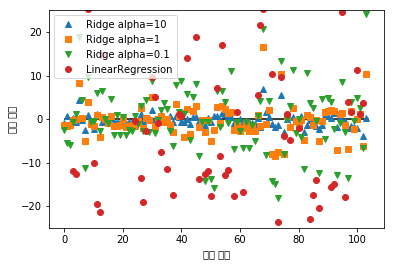

In [33]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

* 고정된 alpha에 train-set의 size를 변화시킴
* LinearRegression, Ridge(alpha=1)의 학습 곡선learning curve는 다음과 같음

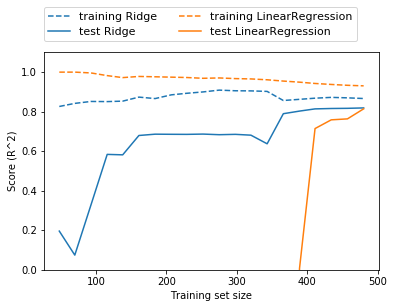

In [34]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

* Ridge의 대안 알고리즘
* L1 규제 방식을 따름: 일부 계수를 0으로 만듦
* 특성 선택feature selection이 자동으로 이루어짐
* Boston housing 데이터셋에 Lasso를 적용하는 예제

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Train-set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Feature size: {}".format(np.sum(lasso.coef_ != 0)))

Train-set score: 0.29
Test-set score: 0.29
Feature size: 4


* Lasso의 결과 좋지 않음
* 특성중 4개만 사용하였으며, 이는 과소적합임
* 규제 alpha=1.0에서 더 적은 alpha 값을 사용하면 어떻게 될까?

In [36]:
# "max_iter" 기본값을 증가시키지 않으면 경고가 발생함
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("Train-set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Feature size: {}".format(np.sum(lasso001.coef_ != 0)))

Train-set score: 0.90
Test-set score: 0.90
Feature size: 33


In [37]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("Train-set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test-set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Feature size: {}".format(np.sum(lasso00001.coef_ != 0)))

Train-set score: 0.95
Test-set score: 0.95
Feature size: 94


* alpha를 너무 낮추면 과대적합이 됨
* 이 경우, LinearRegression과 유사한 결과가 나옴

Text(0,0.5,'계수 크기')

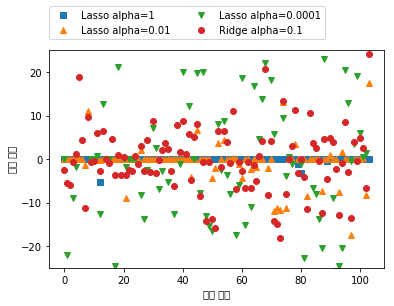

In [38]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

* alpha=1일 때, 계수 대부분이 0이고 나머지 계수들도 크기가 작아짐
* alpha=0.0001일 때, 계수 대부분이 0이 아니므로 규제받지 않은 모델이 구해짐
* Ridge(alpha=0.1) 모델은 alpha=0.01인 lasso 모델과 성능이 비슷하지만 Ridge를 사용하면 0인 계수가 없음
* 실제 Ridge regression을 선호함
* 하지만 feature가 많고 그중 일부만 중요하다면 Lasso가 더 좋은 선택일 수 있음
* 또한 해석이 쉬운 모델은 Lasso임.
* Scikit-learn에는 Lasso와 Ridge의 페널티를 결합한 ElasticNet을 제공함(R의 glimnet package와 유사?).
* 이 경우, 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 함

### 분류용 선형 모델

* Binary classification
* 선형회귀와 매우 유사
* 직선, 평면, 초평면(>3차원)의 결정 경계가 입력의 선형함수임
* (1) 로지스틱 회귀: linear_model.LogisticRegression
* (2) SVM: svm.LinearSVC (support vector classifier)

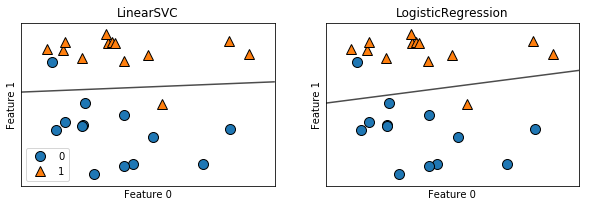

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

* 둘 다 L2 규제 사용. 비슷한 결과 보임
* LogistircRegression과 LinearSVC 모두 매개변수 C의 값이 높아지면 규제의 강도가 높아짐
* 높은 C 값은 overfitting, 낮은 C 값은 underfitting 가능성 있음

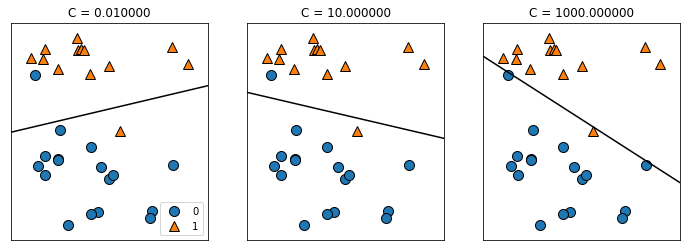

In [40]:
mglearn.plots.plot_linear_svc_regularization()

* 왼쪽: C=0.01, 중간: C=10, 오른쪽: C=1000
* 오른쪽 결과는 overfitting 되었음

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Train-set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test-set score: {:.3f}".format(logreg.score(X_test,y_test)))

Train-set score: 0.953
Test-set score: 0.958


* 훈련 세트와 테스트세트의 성능이 매우 비슷하므로 과소적합인 듯?
* 모델의 제약을 풀어주기 위해 C를 증가시킬 필요가 있음

In [46]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Train-set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test-set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Train-set score: 0.972
Test-set score: 0.965


In [48]:
logreg001 = LogisticRegression(C=.01).fit(X_train,y_train)
print("Train-set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test-set score: {:.3f}".format(logreg001.score(X_test,y_test)))

Train-set score: 0.934
Test-set score: 0.930


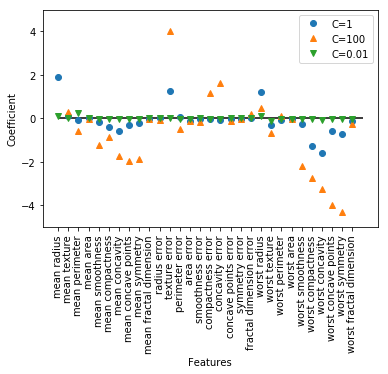

In [57]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.legend()

* L1 규제를 사용할 때의 분류 정확도와 계수 그래프

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


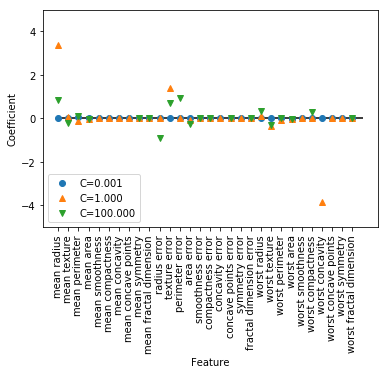

In [59]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train,y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient")

plt.ylim(-5,5)
plt.legend(loc=3)

* 선형 모델과 회귀에서의 선형 모델 사이에는 유사점이 있음.
* 회귀에서처럼, 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부만을 사용할지 결정하는 penalty 매개변수임.

### 다중 클래스 분류용 선형 모델

* 로지스틱 회귀는 softmax 함수를 사용한 다중 클래스 분류 알고리즘을 지원함
* 그 외 선형 분류 모델은 태생적으로 이진 분류만을 지원함
* 일대다 방식 one-vs,-rest: 클래스의 수만큼 이진 분류 모델을 만들어 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택함
* 예시: 2차원의 정규분포를 따르는 세 개의 클래스를 가진 데이터에 적용

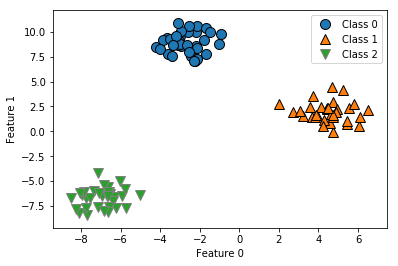

In [60]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

* 이 데이터셋에 LinearSVC를 적용한 경우,

In [64]:
linear_svm = LinearSVC().fit(X, y)
print("Coef Array size: ",linear_svm.coef_.shape)
print("Intercept Array size: ",linear_svm.intercept_.shape)

Coef Array size:  (3, 2)
Intercept Array size:  (3,)


Text(0,0.5,'Feature 1')

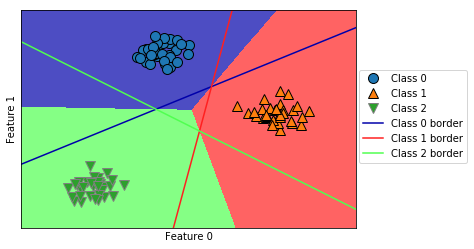

In [70]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0','Class 1', 'Class 2', 'Class 0 border','Class 1 border','Class 2 border'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 장단점과 매개변수

* 회귀 모델의 주요 매개변수: alpha
* LinearSVC, LogisticRegression의 주요 매개변수: C
* alpha 값이 클수록, C 값이 작을수록 모델이 단순해짐
* 보통 C와 alpha는 log scale로 최적치를 정함
* L1 or L1 규제 중 사용해야 함. 중요한 특성이 많지 않을 경우 L1 규제 사용. 그렇지 않은 경우 L2 규제 사용
* 선형모델은 학습 속도가 빠르고 예측도 빠름
* 대용량(수십만~) 데이터셋을 처리할 때는 LogisticRegression, Ridge에서 solver='sag' 옵션을 줌
* 다른 대안으로 SGDClassifier, SGDRegressor를 사용할 수 있음
* 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동함
* 그러나 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋음

### 2.3.4 Naive Bayes Classifier

* 나이브 베이즈 분류기는 선형 모델과 매우 유사함
* LogisticRegression, LinearSVC 보다 훈련속도는 빠르지만, 일반화 성능이 조금 낮음
* Naive Bayes Classifier는 각 특성별로 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합함
* Scikit-learn: 
  * GaussianNB: 연속 데이터에 사용
  * BernoulliNB: 이진 데이터(텍스트)에 사용
  * MultinomiaNB: 정수(카운트, 텍스트) 데이터에 사용
* BernoulliNB 예시: 0이 아닌 것이 몇 개인지 셈

In [71]:
X = np.array([[0,1,0,1],
                       [1,0,1,1],
                       [0,0,0,1],
                       [1,0,1,0]])
y = np.array([0,1,0,1])

In [72]:
counts = {}
for label in np.unique(y):
    # 클래스 마다 반복
    # 특성마다 1이 나타난 횟수를 셈
    counts[label] = X[y == label].sum(axis=0)
print("Feature count:\n{}".format(counts))

Feature count:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


* MultinomialNB: 클래스별 특성의 평균을 계산
* GaussianNB: 클래스별 특성의 표준편차와 평균을 계산

### 장단점과 매개변수

* MultinomialNB, BernoulliNB는 alpha 매개변수를 가짐
* alpha의 개수만큼 알고리즘의 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 추가함
* 이는 통계 데이터를 완만하게 만듬. 모델 복잡도는 낮아짐. underfitting
* alpha 값은 성능 향상에 크게 관여하지 않음
* GaussianNB는 대부분 고차원 데이터셋에 사용. 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트 하는데 사용
* MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋 (예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높음
* 나이브 베이즈 모델과 선형 모델의 장단점은 비슷
* 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에서 나이브 베이즈 모델을 시도해 봄직함.

### 2.3.5 Decision tree

* 결정 트리는 분류와 회귀 문제에 널리 사용됨
* 결정에 다다르기 위해 yes/no 질문을 이어 나가면서 학습함(스무고개 놀이와 비슷함)
* 반복된 테스트는 하나의 축을 따라 데이터를 둘로 나누는 것을 반복하는 것임
* 이는 계층적으로 영역을 분할해가는 알고리즘임
* 데이터를 분할하는 것은 각 분할된 영역이 한 개의 타깃값을 가질 때까지 반복됨
* 타깃 하나로만 이뤄진 노드를 순수노드 pure node라고 부름
* 회귀 문제에도 트리를 사용할 수 있음

### 결정 트리의 복잡도 제어

* 